<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/210406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#scikit-learn 복습

import sklearn as skl
import sklearn.datasets as sdset

dset = sdset.load_iris()

#print(dset)
print(dset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#scikit-learn 데이터(독립변수,인스턴스)는 대문자 X 타겟(종속변수,타겟)레이블은 소문자 y로 표기함- 코딩컨벤션?
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    dset['data'],
    dset['target'],
    test_size=0.2,
    random_state=0
)
#위에서 자른대로 150 * 0.2 = 30의 크기로 시험 데이터 자르고 나머지 120은 훈련용
print(X_test.shape,y_test.shape)

(30, 4) (30,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a5178d250>,
      dtype=object)

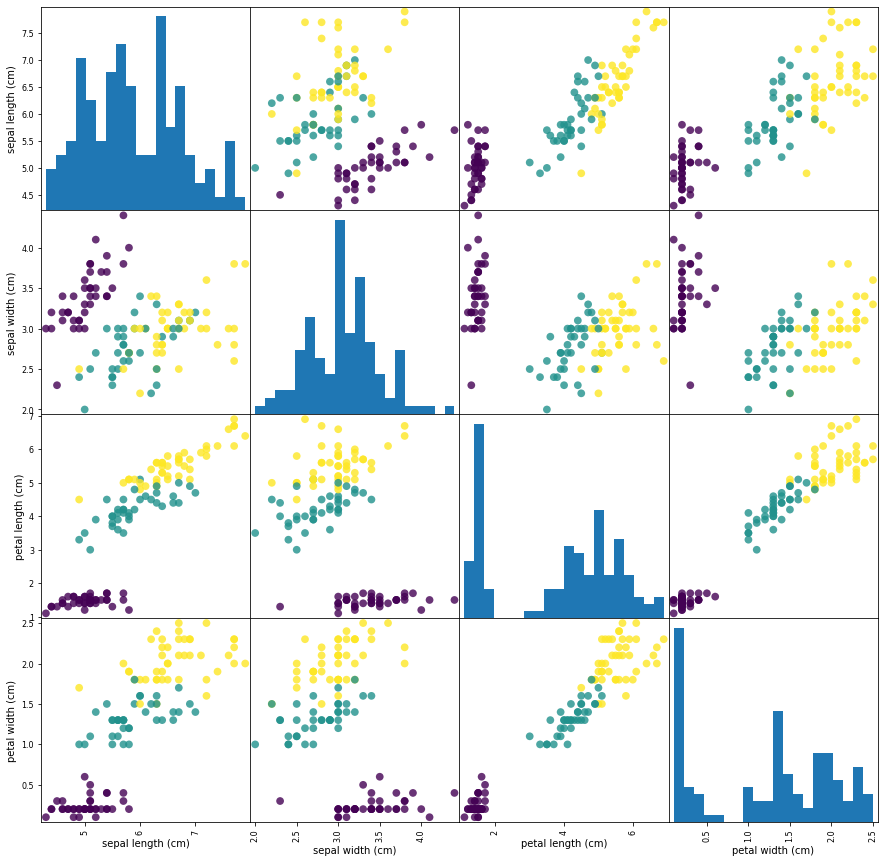

In [10]:
#일단 산점도로 데이터의 성격을 파악
import pandas as pd
dframe =pd.DataFrame(X_train,columns=dset.feature_names)
#독립변수만 으로 데이터 프레임

#산점도 옵션값은 레퍼런스 찾아보기.
pd.plotting.scatter_matrix(
    dframe, 
    c=y_train, ##
    figsize=(15,15), 
    marker='o', 
    hist_kwds={'bins':20},
    s=60,
    alpha=0.8
)

In [18]:
#알고리즘 선택
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=1)

#학습
knn.fit(X_train,y_train)


#학습된 모델에서 분류하기 해보기
import numpy as np
#꽃입과 꽃받침 정보
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
print(prediction)
print('분류 예측한 품종 : ', dset['target_names'][prediction])

[0]
분류 예측한 품종 :  ['setosa']


In [20]:
#테스트 데이터 셋으로 평가실행
y_pred=knn.predict(X_test)

#평가 정확도는?
print('평가 정확도는 ? ',np.mean(y_pred == y_test))

평가 정확도는 ?  1.0


#회기(Regression)

In [ ]:
'''
코스트 펑션

경사하강법

갱신 스텝은 휴리스틱하게 0.1 ~ 0.0001 경험과 초기값에 의해 
너무 작으면 오래 걸리고 너무 크면 발산하다.
'''


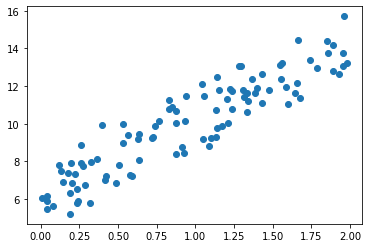

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

X= 2* np.random.rand(100,1) #표준정규분포
y= 6 + 4 * X + np.random.randn(100,1) #랜덤값은 노이즈 가우시안 분포

plt.scatter(X,y)

In [68]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    #초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    
    #초기 가중치로 예측하고 오차계산
    y_pred =np.dot(X,w1.T)+w0 #r계수 가중치 바이어스 가중치 계산식 그대로 
    diff=y-y_pred #정답에서 예측을 뺌

    #dot을 연산위해 1인 행렬 생성
    w0_factors = np.ones((N,1))

    #w1과 w0을 업데이트할 w1_update와 w0_update계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) #계수
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) #바이어스 여기는 x' =1인 자리.
    # - 는 방향, (2/N)은? 요기 복습필요.

    return w1_update, w0_update

In [54]:
#경사하강 주어진 회수 실행
def gradient_descent_steps(X, y, iters=10000):
    w0=np.zeros((1,1)) #1행1열
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0, X, y, learning_rate=0.01)
        # if (ind%5 ==0): print(w1_update, w0_update)   #거리 줄어드는 모양         
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0


가중치 [[4.02181364]] [[6.16203122]]
코스트 0.9934784315632568


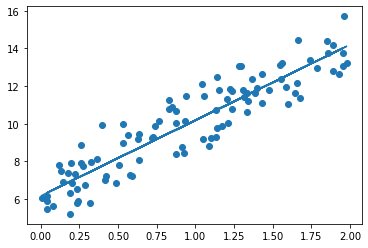

In [69]:
def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000) #1000번만 실행
print('가중치',w1,w0)
y_pred= w1[0,0] * X + w0
print('코스트',get_cost(y,y_pred))

plt.scatter(X,y)
plt.plot(X,y_pred)

w1: 4.247 w0: 5.901
Stochastic Gradient Descent Total Cost:1.0216


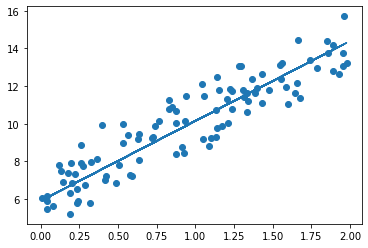

In [65]:
'''
stocastic : 배치 사이즈 랜덤추출
'''

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장 (참고 : https://medium.com/@shistory02/numpy-permutation-vs-shuffle-34fe56f0c246)
        # Stochastic gradient descent / Mini-batch graident descnet (참고 : https://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        #permutation은 array를 복사해서 셔플을 한다.
        # (shuffle은 array를 셔플해서 INPLACE를 한다. : array 자체가 변함)

        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print(f'Stochastic Gradient Descent Total Cost:{get_cost(y, y_pred):.4f}')

plt.scatter(X,y)
plt.plot(X,y_pred)

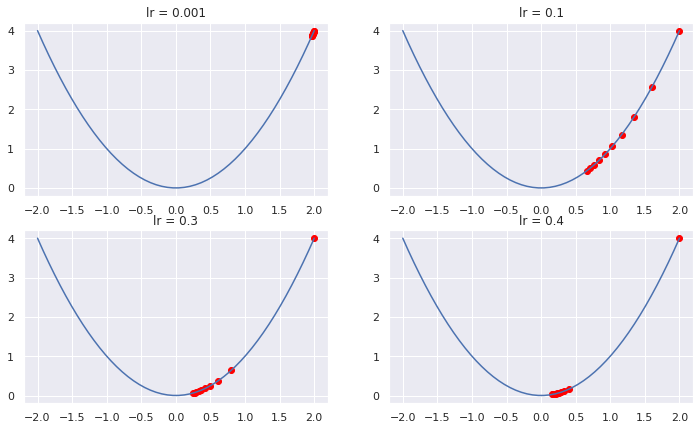

In [134]:
import numpy as np
import matplotlib.pyplot as plt
lr_list=[0.001, 0.1, 0.3, 0.4] #러닝레이트

def get_derivative(lr_list):
    w_old=2
    derivative = [w_old]
    y=[w_old**2] #손실 함수를 y= x^2로 정의함

    for i in range(1,10):
        #먼저 해당 위치의 미분값을 구함
        dev_value=w_old**2

        #위의 값을 이용하여 가중치를 업데이트
        #print(w_old,dev_value)
        w_new = w_old - lr * dev_value
        w_old = w_new

        derivative.append(w_new) #업데이트된 가중치를 저장함.
        y.append(w_new ** 2)#업데이트된 가중치의 손실값을 저장함.

    return derivative, y

x=np.linspace(-2,2,50)
x_square = [i**2 for i in x]

fig=plt.figure(figsize=(12,7))

for i,lr in enumerate(lr_list):
    derivative, y= get_derivative(lr)
    ax=fig.add_subplot(2,2,i+1)
    ax.scatter(derivative,y,color='red')
    ax.plot(x,x_square)
    ax.title.set_text('lr = '+str(lr))

plt.show()


#sklearn 데이터셋으로 연습해보기


In [75]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [77]:
boston = datasets.load_boston()

In [85]:
print(type(boston),'\n\n',boston.keys(),'\n\n',boston.data.shape,'\n\n',boston.feature_names)

<class 'sklearn.utils.Bunch'> 

 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) 

 (506, 13) 

 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [87]:
bos=pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE']=boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


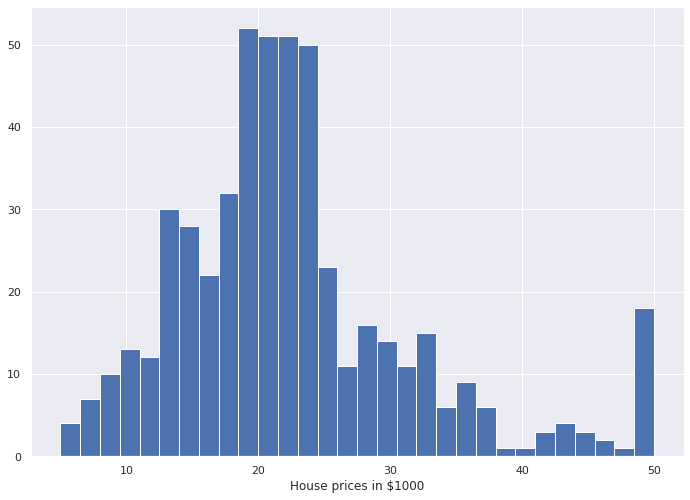

In [90]:
#bos.isnull().sum()
#bos.describe()

sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(bos['PRICE'],bins=30)
plt.xlabel('House prices in $1000')
plt.show()

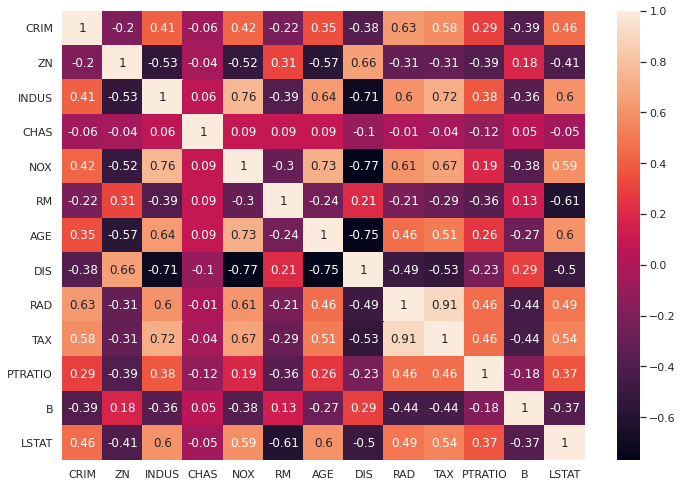

In [93]:
bos_1=pd.DataFrame(boston.data, columns=boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

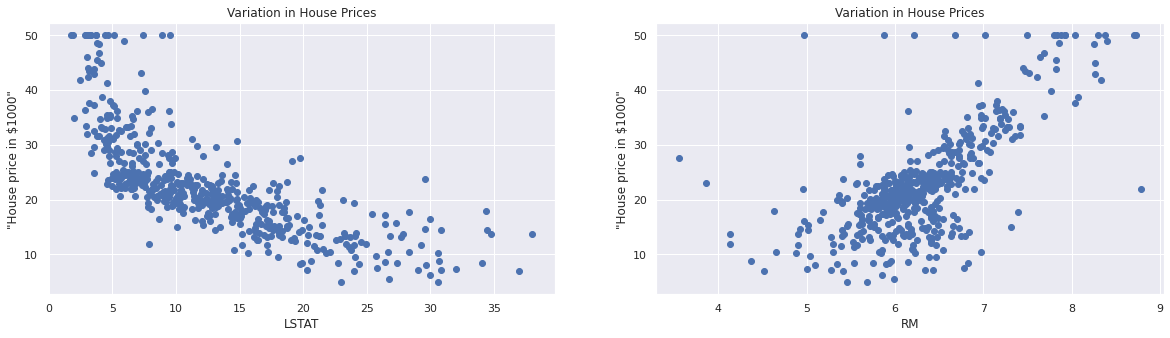

In [99]:
plt.figure(figsize=(20,5))

features=['LSTAT','RM']
target=bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=bos[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title('Variation in House Prices')
    plt.xlabel(col)
    plt.ylabel('"House price in $1000"')

In [140]:
X_rooms=bos.RM
y_price=bos.PRICE

print(X_rooms.shape)
print(y_price.shape)

X_rooms=np.array(X_rooms).reshape(-1,1)
y_price=np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506,)
(506,)
(506, 1)
(506, 1)


In [141]:
#학습/시험 분리
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_rooms,
    y_price,
    test_size=0.2,
    random_state=5
)
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)


(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [146]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, y_train_1),2)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [150]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




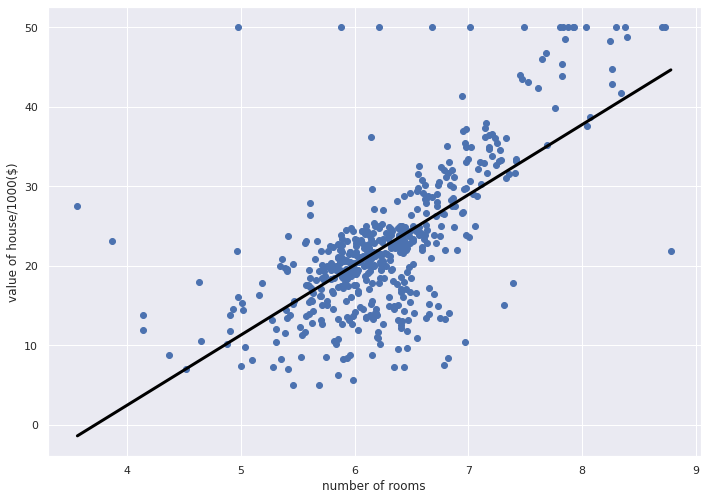

In [147]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

In [151]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [152]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665329
R^2: 0.67




In [153]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
X_constant = sm.add_constant(X)

####요약 통계량 OLS 방법 ->R^2을 이용해도 됨.
model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        07:32:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""